<a href="https://colab.research.google.com/github/momomendoza2476-max/SIMULACI-N-II/blob/main/ferro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

=== RUTAS CARGADAS ===

            origin    destination
R1         Pachuca         Puebla
R2          Puebla        Pachuca
R3        Veracruz         Puebla
R4          Puebla       Veracruz
R5          Puebla       Tehuacán
R6        Tehuacán         Puebla
R7        Veracruz  Coatzacoalcos
R8   Coatzacoalcos       Veracruz
R9        Tuxtepec   Medias Aguas
R10   Medias Aguas       Tuxtepec 

=== MATRIZ DE CONFLICTO ===

      R1   R2   R3   R4   R5   R6   R7   R8   R9  R10
R1   0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0
R2   1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0
R3   1.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  0.0  0.0
R4   1.0  1.0  1.0  0.0  1.0  1.0  1.0  1.0  0.0  0.0
R5   1.0  1.0  1.0  1.0  0.0  1.0  0.0  0.0  0.0  0.0
R6   1.0  1.0  1.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0
R7   0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0
R8   0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  0.0
R9   0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  1.0
R10  0.0  0.0  0.0  0.0  0.0  0

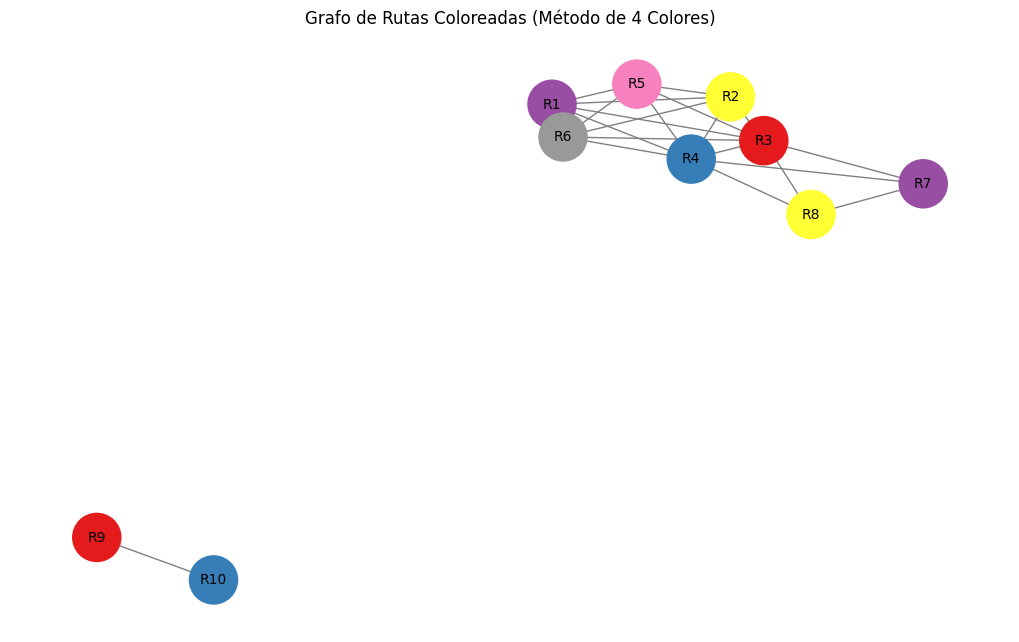

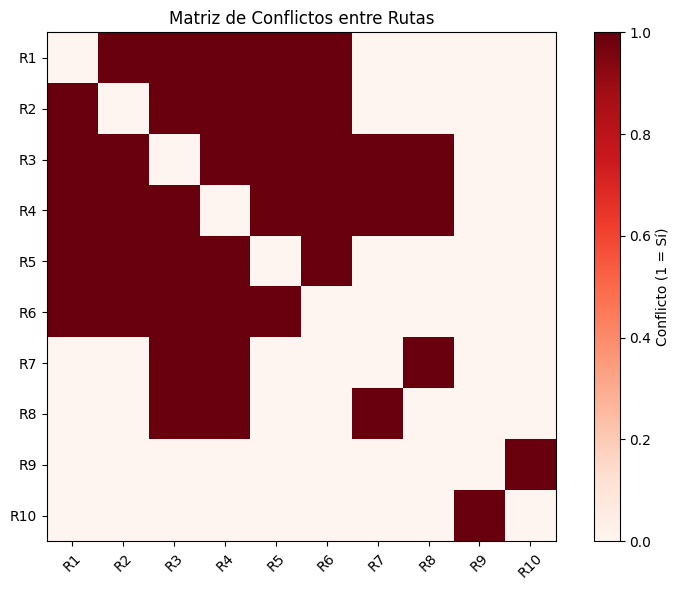

In [1]:
# ============================================
#   OPTIMIZACIÓN DE RUTAS CON 4 COLORES
#   - Construcción de matriz de conflictos
#   - Coloración de grafos (4 colores)
#   - Gráficos automáticos
# ============================================

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

# ===============================
# 1) DEFINICIÓN DE LAS RUTAS
# ===============================
routes = [
    ("Pachuca", "Puebla"),
    ("Puebla", "Pachuca"),
    ("Veracruz", "Puebla"),
    ("Puebla", "Veracruz"),
    ("Puebla", "Tehuacán"),
    ("Tehuacán", "Puebla"),
    ("Veracruz", "Coatzacoalcos"),
    ("Coatzacoalcos", "Veracruz"),
    ("Tuxtepec", "Medias Aguas"),
    ("Medias Aguas", "Tuxtepec")
]

route_ids = [f"R{i+1}" for i in range(len(routes))]

# Create DataFrame
df = pd.DataFrame(routes, columns=["origin", "destination"], index=route_ids)

print("=== RUTAS CARGADAS ===\n")
print(df, "\n")

# ===========================================
# 2) MATRIZ DE CONFLICTO ENTRE RUTAS
# ===========================================
conflict_matrix = pd.DataFrame(
    np.zeros((len(df), len(df))),
    index=df.index,
    columns=df.index
)

for r1 in df.index:
    for r2 in df.index:
        if r1 == r2:
            continue

        # conflict if share origin or destination
        if (df.loc[r1, 'origin'] == df.loc[r2, 'origin']) or \
           (df.loc[r1, 'origin'] == df.loc[r2, 'destination']) or \
           (df.loc[r1, 'destination'] == df.loc[r2, 'origin']) or \
           (df.loc[r1, 'destination'] == df.loc[r2, 'destination']):

            conflict_matrix.loc[r1, r2] = 1

print("=== MATRIZ DE CONFLICTO ===\n")
print(conflict_matrix, "\n")

# Save CSV (optional)
conflict_matrix.to_csv("matriz_conflictos.csv")

# ===========================================
# 3) CONSTRUCCIÓN DEL GRAFO Y COLORACIÓN
# ===========================================
G = nx.Graph()

# add nodes
for r in df.index:
    G.add_node(r, origin=df.loc[r, 'origin'], dest=df.loc[r, 'destination'])

# add edges for conflicts
for r1 in df.index:
    for r2 in df.index:
        if conflict_matrix.loc[r1, r2] == 1:
            G.add_edge(r1, r2)

# apply coloring
colors = nx.coloring.greedy_color(G, strategy="largest_first")

print("=== RESULTADO DE COLORACIÓN ===\n")
for route, color in colors.items():
    print(f"{route} --> Color {color}")

# ===========================================
# 4) GRAFICAR EL GRAFO COLOREADO
# ===========================================
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G, seed=42)

node_colors = [colors[node] for node in G.nodes()]

nx.draw(
    G, pos,
    with_labels=True,
    node_color=node_colors,
    cmap=plt.cm.Set1,
    node_size=1200,
    font_size=10,
    edge_color="gray"
)

plt.title("Grafo de Rutas Coloreadas (Método de 4 Colores)")
plt.show()

# ===========================================
# 5) HEATMAP DE MATRIZ DE CONFLICTOS
# ===========================================
plt.figure(figsize=(8, 6))
plt.imshow(conflict_matrix, cmap="Reds")
plt.colorbar(label="Conflicto (1 = Sí)")
plt.xticks(range(len(df)), df.index, rotation=45)
plt.yticks(range(len(df)), df.index)
plt.title("Matriz de Conflictos entre Rutas")
plt.tight_layout()
plt.show()
